# Оценка результатов A/B-теста

**Описание проекта**  
Оцените корректность проведения теста и проанализируйте его результаты.
Чтобы оценить корректность проведения теста:  
- удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно;  
- проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования.

**Цель проекта**  
Изучить соответствие данных техническому заданию. Оценить результаты A/B-теста.

**Ход исследования**  
- Опишите цели исследования
- Исследуйте данные:
    - Требуется ли преобразование типов?
    - Опишите природу пропущенных значений и дубликатов, если их обнаружите.
- Оцените корректность проведения теста. Обратите внимание на:
    - Соответствие данных требованиям технического задания. Проверьте корректность всех пунктов технического задания.
    - Время проведения теста. Убедитесь, что оно не совпадает с маркетинговыми и другими активностями.
    - Аудиторию теста. Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверьте равномерность распределения по тестовым группам и правильность их формирования.
- Проведите исследовательский анализ данных:
    - Количество событий на пользователя одинаково распределены в выборках?
    - Как число событий в выборках распределено по дням?
    - Как меняется конверсия в воронке в выборках на разных этапах?
    - Какие особенности данных нужно учесть, прежде чем приступать к A/Bтестированию?
- Оцените результаты A/B-тестирования
    - Что можно сказать про результаты A/В-тестирования?
    - Проверьте статистическую разницу долей z-критерием.
- Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Сделайте общее заключение о корректности проведения теста.  
\
\
Исследование состоит из 6 шагов:
1. Шаг 1. Загрузка данных;
2. Шаг 2. Предобработка данных;
3. Шаг 3. Оценка корректности проведения теста;
4. Шаг 4. Проведение исследовательского анализа данных;
5. Шаг 5. Оценка результатов A/B-тестирования;
6. Шаг 6. Общий вывод.

## Шаг 1. Загрузка данных

In [ ]:
pip install plotly -U

In [ ]:
# загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
final_ab_events = pd.read_csv('/datasets/final_ab_events.csv')
ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')

In [ ]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [ ]:
ab_project_marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [ ]:
final_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [ ]:
final_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


**Вывод к шагу 1**  

Для проведения исследования загрузили 4 датафрейма: final_ab_events, ab_project_marketing_events, final_ab_new_users, final_ab_participants. Вывели первые 5 строк данных датафреймов.

## Шаг 2. Предобработка данных

### Исследование и заменена пропущенных значений

**Рассмотрим датафрейм final_ab_events**

In [ ]:
final_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

In [ ]:
f"В столбце 'details' обнаружено {final_ab_events['details'].isna().sum()} пропусков. Это \
{final_ab_events['details'].isna().sum()/len(final_ab_events):.2%} от всех строк датафрейма."

"В столбце 'details' обнаружено 377577 пропусков. Это 85.75% от всех строк датафрейма."

Заменять пропуски в столбце 'details' не будем.  
В столбце 'details' хранятся дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах. Рассмотрим, какими данными заполняется столбец 'details' исходя из значений столбца 'event_name'.

In [ ]:
final_ab_events.groupby('event_name').agg({'details':'nunique'})

,details
event_name,
login,0
product_cart,0
product_page,0
purchase,4


Также отобразим уникальные значения столбца 'details':  

In [ ]:
final_ab_events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

Исходя из этого можем сделать вывод, что данные в столбце 'details' датафрейма final_ab_events заполняются только, если в столбце 'event_name' указано значение purchase. Для других видов событий из 'event_name' столбец 'details' не заполняется.

**Рассмотрим датафрейм ab_project_marketing_events**

In [ ]:
ab_project_marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

В датафрейме ab_project_marketing_events пропусков нет.

**Рассмотрим датафрейм final_ab_new_users**

In [ ]:
final_ab_new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

В датафрейме final_ab_new_users пропусков нет.

**Рассмотрим датафрейм final_ab_participants**

In [ ]:
final_ab_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

В датафрейме final_ab_participants пропусков нет.

### Исследование соответствия типов данных

**Рассмотрим датафрейм final_ab_events**

In [ ]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [ ]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


Изменим тип данных столбца 'event_dt' с object на datetime64.

In [ ]:
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
final_ab_events.info() # проверим правильность изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


**Рассмотрим датафрейм ab_project_marketing_events**

In [ ]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [ ]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


Заменим тип данных столбцов 'start_dt' и 'finish_dt' с object на datetime64.

In [ ]:
ab_project_marketing_events['start_dt'] = \
ab_project_marketing_events['start_dt'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
ab_project_marketing_events['finish_dt'] = \
ab_project_marketing_events['finish_dt'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


**Рассмотрим датафрейм final_ab_new_users**

In [ ]:
final_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [ ]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [ ]:
f"Датафрейм final_ab_new_users содержит {final_ab_new_users.shape[0]} новых пользователей."

'Датафрейм final_ab_new_users содержит 61733 новых пользователей.'

Заменим тип данных столбца 'first_date' с object на datetime64.

In [ ]:
final_ab_new_users['first_date'] = final_ab_new_users['first_date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


**Рассмотрим датафрейм final_ab_participants**

In [ ]:
final_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [ ]:
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


Типы данных в датафрейме final_ab_participants определены верно.

### Исследование и удаление дубликатов

**Рассмотрим датафрейм final_ab_events**

In [ ]:
final_ab_events.duplicated().sum()

0

Явных дубликатов в датафрейме final_ab_events нет.  

**Рассмотрим датафрейм ab_project_marketing_events**

In [ ]:
ab_project_marketing_events.duplicated().sum()

0

Явных дубликатов в датафрейме ab_project_marketing_events нет.

**Рассмотрим датафрейм final_ab_new_users**

In [ ]:
final_ab_new_users.duplicated().sum()

0

Видим, что явных дубликатов в датафрейме final_ab_new_users нет.  

Проверим, есть ли явные дубликаты только по столбцу 'user_id', так как в датафрейме final_ab_new_users представлены новые пользователи, зарегистрировавшиеся с 7 по 21 декабря 2020 года.

In [ ]:
final_ab_new_users['user_id'].duplicated().sum()

0

Явных дубликатов по столбцу 'user_id' также нет.

**Рассмотрим датафрейм final_ab_participants**

In [ ]:
final_ab_participants.duplicated().sum()

0

Явных дубликатов в датафрейме final_ab_participants нет.  

Так как в final_ab_participants представлены участники разных тестов, проверим явные дубликаты по столбцам 'user_id' и 'ab_test'.

In [ ]:
final_ab_participants[['user_id','ab_test']].duplicated().sum()

0

Явных дубликатов по столбцам 'user_id' и 'ab_test' нет.

**Вывод к шагу 2**  

- На шаге 2.1 исследовали пропущенные значения. В датафрейме 'final_ab_events' в столбце 'details' обнаружили 377577 пропусков, это 85.75% от всех строк данного датафрейма, поэтому удалять или заменять пропуски не стали. В остальных датафреймах пропусков не обнаружено.  
- На шаге 2.2 исследовали соответствие типов данных. В датафрейме final_ab_events изменили тип данных столбца 'event_dt' с object на datetime64. В датафрейме ab_project_marketing_events изменили тип данных столбцов 'start_dt' и 'finish_dt' с object на datetime64. В датафрейме final_ab_new_users изменили тип данных столбца 'first_date' с object на datetime64.  
- На шаге 2.3 исследовали данные на наличие дубликатов. Не обнаружили дубликатов в датафреймах.  

## Шаг 3. Оценка корректности проведения теста

### Проверьте соответствие данных требованиям технического задания.   
Проверьте корректность всех пунктов технического задания.

**Техническое задание**  

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: в тест должно быть отобрано 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие product_page ,
    - просмотры корзины — product_cart ,
    - покупки — purchase .

**Рассмотрим датафрейм с участниками теста final_ab_new_users.**

In [ ]:
final_ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [ ]:
f"Самая ранняя дата регистрации новых пользователей в датасете final_ab_new_users: \
{final_ab_new_users['first_date'].dt.date.min()}"

'Самая ранняя дата регистрации новых пользователей в датасете final_ab_new_users: 2020-12-07'

In [ ]:
f"Самая поздняя дата регистрации новых пользователей в датасете final_ab_new_users: \
{final_ab_new_users['first_date'].dt.date.max()}"

'Самая поздняя дата регистрации новых пользователей в датасете final_ab_new_users: 2020-12-23'

Видим, что минимальная дата регистрации новых пользователей совпадает с датой запуска теста. А вот максимальная дата регистрации новых пользователей в датасете больше, чем дата, указанная в ТЗ.

Отфильтруем датафрейм final_ab_new_users по first_date и region. Отфильтрованный датафрейм назовём final_ab_new_users_filtered.

In [ ]:
final_ab_new_users_filtered = final_ab_new_users[final_ab_new_users['first_date']<='2020-12-21']
final_ab_new_users_filtered = final_ab_new_users_filtered[final_ab_new_users_filtered['region']=='EU']

In [ ]:
final_ab_new_users_filtered.shape[0] # посмотрим, сколько пользователей осталось

42340

**Рассмотрим датафрейм final_ab_participants.**

In [ ]:
final_ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


Посмотрим, как распределены пользователи в столбце 'ab_test', а также 'ab_test' и 'group'.

In [ ]:
final_ab_participants.groupby('ab_test',as_index=False).agg({'user_id':'count'})

,ab_test,user_id
0,interface_eu_test,11567
1,recommender_system_test,6701


In [ ]:
final_ab_participants.groupby(['ab_test','group'],as_index=False).agg({'user_id':'count'})

,ab_test,group,user_id
0,interface_eu_test,A,5831
1,interface_eu_test,B,5736
2,recommender_system_test,A,3824
3,recommender_system_test,B,2877


Видим, что в датафрейме final_ab_participants представлены 2 теста: 'recommender_system_test' и 'interface_eu_test'.

**Объединим датафреймы final_ab_new_users_filtered и final_ab_participants_filtered**

In [ ]:
united_df = final_ab_new_users_filtered.merge(final_ab_participants, on='user_id')
united_df.head()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
2,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test
3,E6DE857AFBDC6102,2020-12-07,EU,PC,B,recommender_system_test
4,E6DE857AFBDC6102,2020-12-07,EU,PC,B,interface_eu_test


In [ ]:
f"Длина датафрейма united_df: {len(united_df)} строк."

'Длина датафрейма united_df: 16916 строк.'

Посмотрим, как распределены пользователи датафрейма united_df по тестам и группам после объединения.

In [ ]:
united_df.groupby(['ab_test','group'], as_index=False).agg({'user_id':'count'})

,ab_test,group,user_id
0,interface_eu_test,A,5342
1,interface_eu_test,B,5223
2,recommender_system_test,A,3634
3,recommender_system_test,B,2717


In [ ]:
f"% пользователей из Европы в тесте 'recommender_system_test' из датафрейма united_df к пользователям из Европы, \
зарегистрировавшимся с 7 по 21 декабря из датафрейма final_ab_new_users, составляет: \
{len(united_df[united_df['ab_test']=='recommender_system_test']['user_id'].unique())/len(final_ab_new_users[(final_ab_new_users['region']=='EU')&(final_ab_new_users['first_date']>='2020-12-07')&(final_ab_new_users['first_date']<='2020-12-21')]):.2%}, \
что совпадает с 15%, указанными в ТЗ. united_df - датафрейм, который состоит из отфильтрованного по дате регистрации и региону \
пользователей исходного датафрейма final_ab_new_users, соединённого с исходным датафреймом final_ab_participants по столбцу \
'user_id'."

"% пользователей из Европы в тесте 'recommender_system_test' из датафрейма united_df к пользователям из Европы, зарегистрировавшимся с 7 по 21 декабря из датафрейма final_ab_new_users, составляет: 15.00%, что совпадает с 15%, указанными в ТЗ. united_df - датафрейм, который состоит из отфильтрованного по дате регистрации и региону пользователей исходного датафрейма final_ab_new_users, соединённого с исходным датафреймом final_ab_participants по столбцу 'user_id'."

Посмотрим, какова численность пользователей в датафрейме final_ab_new_users только из Европы, зарегистрировавшихся с 07-12-2020 по 21-12-2020:

In [ ]:
len(final_ab_new_users[(final_ab_new_users['region']=='EU')&(final_ab_new_users['first_date']>='2020-12-07')&(final_ab_new_users['first_date']<='2020-12-21')])

42340

Необходимо проверить, пересекаются ли пользователи из различных групп тестов.

In [ ]:
united_df['user_id'].duplicated().sum()

1602

In [ ]:
(
    united_df[united_df['user_id'].duplicated()].groupby(['ab_test','group'],as_index=False)
    .agg({'user_id':'count'})
)

,ab_test,group,user_id
0,interface_eu_test,A,819
1,interface_eu_test,B,783


Видим, что пользователи из различных тестов пересекаются друг с другом.  
'interface_eu_test' - это конкурирующий тест для изучаемого нами recommender_system_test. Группа B теста 'interface_eu_test' - это пользователи, которые подверглись влиянию данного теста. Поэтому пользователей группы B теста 'interface_eu_test', а также их дубликаты в тесте 'recommender_system_test', мы должны удалить.  
Пользователей из группы A теста 'interface_eu_test' не подверглись влиянию теста 'interface_eu_test' из-за того, что группа A - контрольная группа. Поэтому дубликаты группы A теста 'interface_eu_test' в 'recommender_system_test' мы можем оставить, а пользователей группы A 'interface_eu_test' мы должны удалить, так как мы изучаем 'recommender_system_test'.

Рассмотрим дублирующихся пользователей группы B теста 'interface_eu_test'. Назовём датафрейм с данными дублирующимися пользователями duplicates_in_group_B_interface_eu_test.  
Сгруппируем по тесту и группе всех пользователей датафрейма united_df с user_id, которые находятся в датафрейме duplicates_in_group_B_interface_eu_test. То есть отобразим всех пользователей, дубикаты которых находятся в группе B теста 'interface_eu_test'.

In [ ]:
duplicates_in_group_B_interface_eu_test = (
    united_df[(united_df['group']=='B')&(united_df['ab_test']=='interface_eu_test')&(united_df['user_id'].duplicated())]
)
display(duplicates_in_group_B_interface_eu_test)

all_duplicates_users_from_group_B_interface_eu_test_grouped_test_and_group = (
    united_df[
        united_df['user_id'].isin(duplicates_in_group_B_interface_eu_test['user_id'])
    ]
    .groupby(['ab_test','group',],as_index=False).agg({'user_id':'count'})
    .rename(columns={'user_id':'duplicated_users_from_group_B_interface_eu_test'})
)
#display(all_duplicates_users_from_group_B_interface_eu_test_grouped_test_and_group)

percent_of_duplicated_users_from_group_B_interface_eu_test = (
    all_duplicates_users_from_group_B_interface_eu_test_grouped_test_and_group
    .merge(united_df.groupby(['ab_test','group'], as_index=False).agg({'user_id':'count'}) , on=['ab_test','group'])
    .rename(columns={'user_id_x':'duplicated_users_from_group_B_interface_eu_test', 'user_id_y':'users_in_group_of_test',
                    'user_id':'users_in_group_of_test'})
)
#display(percent_of_duplicated_users_from_group_B_interface_eu_test)

percent_of_duplicated_users_from_group_B_interface_eu_test['percent,%'] = round(
    percent_of_duplicated_users_from_group_B_interface_eu_test['duplicated_users_from_group_B_interface_eu_test']/
    percent_of_duplicated_users_from_group_B_interface_eu_test['users_in_group_of_test']
    *100,2)
display(percent_of_duplicated_users_from_group_B_interface_eu_test)

,user_id,first_date,region,device,group,ab_test
4,E6DE857AFBDC6102,2020-12-07,EU,PC,B,interface_eu_test
74,D755F72C453BF6A7,2020-12-07,EU,Mac,B,interface_eu_test
83,DF40EF85F55A958D,2020-12-07,EU,Mac,B,interface_eu_test
88,2E30DF2649604771,2020-12-07,EU,iPhone,B,interface_eu_test
91,CBEFCA3BFDE4CC58,2020-12-07,EU,iPhone,B,interface_eu_test
...,...,...,...,...,...,...
16852,96BDD55846D1F7F6,2020-12-20,EU,iPhone,B,interface_eu_test
16866,FA8706D1E274805E,2020-12-20,EU,iPhone,B,interface_eu_test
16873,32E13C1C0F6AC96E,2020-12-20,EU,iPhone,B,interface_eu_test
16876,549A5092FD1BD5D9,2020-12-20,EU,iPhone,B,interface_eu_test


,ab_test,group,duplicated_users_from_group_B_interface_eu_test,users_in_group_of_test,"percent,%"
0,interface_eu_test,B,783,5223,14.99
1,recommender_system_test,A,439,3634,12.08
2,recommender_system_test,B,344,2717,12.66


Видим, что дублирующиеся пользователи из группы B теста 'interface_eu_test' встречаются в группах A и B 'recommender_system_test'. Процент дублирующихся пользователей группы B теста 'interface_eu_test' в группе A теста 'recommender_system_test' составляет 12.08%, в группе 'B' теста 'recommender_system_test' - 12.66%.   

Удалим строки с пользователями группы B 'interface_eu_test', дубли которых встречаются в тесте 'recommender_system_test', а также всех пользователей из группы B 'interface_eu_test'. Назовём отфильтрованный датафрейм united_df_without_users_from_group_B_interface_eu_test.

In [ ]:
# сначала удаляем дублирующихся пользователей группы 'B' теста 'interface_eu_test' из датафрейма united_df
united_df_without_users_from_group_B_interface_eu_test = united_df[~(united_df['user_id']
                               .isin(duplicates_in_group_B_interface_eu_test['user_id']))]
# затем удаляем пользователей группы 'B' теста 'interface_eu_test' из датафрейма united_df
united_df_without_users_from_group_B_interface_eu_test = (
    united_df_without_users_from_group_B_interface_eu_test[~(
        (united_df_without_users_from_group_B_interface_eu_test['group']=='B')&
        (united_df_without_users_from_group_B_interface_eu_test['ab_test']=='interface_eu_test'))]
)

# отобразим датафрейм united_df_without_users_from_group_B_interface_eu_test после фильтрафии датафрейма united_df
united_df_without_users_from_group_B_interface_eu_test

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
7,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test
8,DD4352CDCF8C3D57,2020-12-07,EU,Android,A,interface_eu_test
9,E6AF85675078215D,2020-12-07,EU,Android,A,interface_eu_test
...,...,...,...,...,...,...
16907,0F7D49FC184EDCDE,2020-12-20,EU,PC,A,recommender_system_test
16908,EF80B4EA44F7B607,2020-12-20,EU,Android,A,interface_eu_test
16909,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test
16910,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test


После удаления дубликатов пользователей группы B 'interface_eu_test', которые встречаются в 'recommender_system_test', а также пользователей группы B 'interface_eu_test' посмотрим, как распредилились по тестам и группам оставшиеся пользователи:

In [ ]:
united_df_without_users_from_group_B_interface_eu_test.groupby(['ab_test','group']).agg({'user_id':'count'})

user_id
ab_test                 group         
interface_eu_test       A         5342
recommender_system_test A         3195
                        B         2373

Также удалим пользователей группы A теста 'interface_eu_test'. Как видим выше, их 5342 пользователя. Но не будем удалять дубликаты данных пользователей в тесте 'recommender_system_test'.  
Назовём датафрейм с удалёнными пользователями группы A 'interface_eu_test' df.

In [ ]:
df = (
    united_df_without_users_from_group_B_interface_eu_test[~(
                                                           (united_df_without_users_from_group_B_interface_eu_test['ab_test']=='interface_eu_test')&
                                                           (united_df_without_users_from_group_B_interface_eu_test['group']=='A')
    )]
)
df

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
7,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test
10,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
12,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test
17,16C69ED14DA9F4A8,2020-12-07,EU,PC,B,recommender_system_test
...,...,...,...,...,...,...
16902,3CA972F86411CF13,2020-12-20,EU,PC,A,recommender_system_test
16907,0F7D49FC184EDCDE,2020-12-20,EU,PC,A,recommender_system_test
16909,574ACBC674BC385D,2020-12-20,EU,Mac,A,recommender_system_test
16910,0416B34D35C8C8B8,2020-12-20,EU,Android,A,recommender_system_test


Посмотрим на разделение датафрейма df по тестам и группам. Назовём сгруппированный датафрейм count_of_users_in_ab_test

In [ ]:
count_of_users_in_ab_test = df.groupby('group').agg({'user_id':'nunique'})
count_of_users_in_ab_test

,user_id
group,
A,3195
B,2373


**Объединим датафрейм df с датафреймом с событиями final_ab_events**

In [ ]:
final_ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


Назовём объединённый датафрейм df_with_events с данными из датафреймов df и final_ab_events

In [ ]:
df_with_events = df.merge(final_ab_events, on='user_id')
df_with_events.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN


Выясним, пользователи из каких групп и тестов не совершили ни одного действия и, соответственно, не попали в датафрейм df_with_events, а также общее количество таких пользователей:

In [ ]:
len(df[~(df['user_id'].isin(df_with_events['user_id']))]['user_id'].unique())

2518

In [ ]:
df[~(df['user_id'].isin(df_with_events['user_id']))].groupby(['ab_test','group']).agg({'user_id':'nunique'})

user_id
ab_test                 group         
recommender_system_test A          916
                        B         1602

Видим, что наибольшее количество пользователей, которые не совершали никаких действий, это пользователи из группы 'B' теста 'recommender_system_test'.

Далее создадим в датафрейме df_with_events столбец 'lifetime', чтобы оставить только события, которые произошли в течение 14 дней, или 13 лайфтаймов(0 лайфтайм - день регистрации пользователя).

In [ ]:
df_with_events['lifetime'] = (df_with_events['event_dt'].dt.date - df_with_events['first_date'].dt.date)
df_with_events['lifetime'] = df_with_events['lifetime'].dt.days
df_with_events.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,lifetime
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:10,product_page,NaN,0
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07 21:52:07,login,NaN,0
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07 15:32:54,product_page,NaN,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08 08:29:31,product_page,NaN,1
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10 18:18:27,product_page,NaN,3


Создадим отфильтрованный датафрейм df_with_events_filtered_by_lifetime, куда войдут события с лайфтаймом до 13-го включительно.

In [ ]:
df_with_events_filtered_by_lifetime = df_with_events[df_with_events['lifetime']<=13]

In [ ]:
f"После фильтрации датафрейма df_with_events по лайфтайму, в новом датафрейме df_with_events_filtered_by_lifetime \
насчитывается {len(df_with_events_filtered_by_lifetime['user_id'].unique())} уникальных пользователей и \
{len(df_with_events_filtered_by_lifetime)} событий."

'После фильтрации датафрейма df_with_events по лайфтайму, в новом датафрейме df_with_events_filtered_by_lifetime насчитывается 3050 уникальных пользователей и 19849 событий.'

Выясним, пользователи из каких групп теста не совершили ни одного действия в течение 14 дней после регистрации и, соответственно, не попали в датафрейм df_with_events:

In [ ]:
f"Количество пользователей из датафрейма df_with_events, которые не совершили ни одного действия из-за ограничений \
по лайфтайму: {len(df_with_events[~(df_with_events['user_id'].isin(df_with_events_filtered_by_lifetime['user_id']))]['user_id'].unique())}."

'Количество пользователей из датафрейма df_with_events, которые не совершили ни одного действия из-за ограничений по лайфтайму: 0.'

In [ ]:
f"В результате фильтрации датафрейма df_with_events по лайфтайму удалили \
{len(df_with_events) - len(df_with_events_filtered_by_lifetime)} событий."

'В результате фильтрации датафрейма df_with_events по лайфтайму удалили 715 событий.'

Также по условиям ТЗ необходимо оставить только события с 07-12-2020 по 04-01-2021.  
Выясним минимальную и максимальную даты событий в датафрейме df_with_events_filtered_by_lifetime:

In [ ]:
f"Минимальная дата события в датафрейме df_with_events_filtered_by_lifetime: \
{df_with_events_filtered_by_lifetime['event_dt'].dt.date.min()}."

'Минимальная дата события в датафрейме df_with_events_filtered_by_lifetime: 2020-12-07.'

In [ ]:
f"Максимальная дата события в датафрейме df_with_events_filtered_by_lifetime: \
{df_with_events_filtered_by_lifetime['event_dt'].dt.date.max()}."

'Максимальная дата события в датафрейме df_with_events_filtered_by_lifetime: 2020-12-29.'

Видим, что в датафрейме нет данных позднее 29-12-2020.

Посмотрим, как пользователи распределены по группам теста 'recommender_system_test' в датафрейме df_with_events_filtered_by_lifetime:

In [ ]:
# создадим переменную count_of_active_users_in_ab_test, в которой будет храниться количество пользователей датафрейма
# df_with_events_filtered_by_lifetime для каждой группы ab-теста 'recommender_system_test':
count_of_active_users_in_ab_test = df_with_events_filtered_by_lifetime.groupby('group').agg({'user_id':'nunique'})
count_of_active_users_in_ab_test

,user_id
group,
A,2279
B,771


**Рассмотрим датафрейм ab_project_marketing_events**

Тест 'recommender_system_test' проводился с 07-12-2020 по 04-01-2021. Проверим, проходили какие-либо маркетинговые активности в это время.

In [ ]:
min_date = pd.to_datetime('2020-12-07',  format='%Y-%m-%d')
max_date = pd.to_datetime('2021-01-04',  format='%Y-%m-%d')
(
    ab_project_marketing_events[ab_project_marketing_events['regions'].str.contains('EU')]\
    .query('@min_date<=start_dt<=@max_date or @min_date<=finish_dt<=@max_date')
)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


Видим, что во время проведения recommender_system_test происходит маркетинговая активность 'Christmas&New Year Promo'.  
Для того, чтобы оценить влияние маркетинговой активности на проведение нашего теста, построим график с количеством событий за каждый день проведения теста.

Переведём столбцы 'event_dt' и 'first_date' датафрейма df_with_events_filtered_by_lifetime в формат, в котором можем построить график.

In [ ]:
df_with_events_filtered_by_lifetime['event_dt'] = df_with_events_filtered_by_lifetime['event_dt'].dt.date
df_with_events_filtered_by_lifetime['first_date'] = df_with_events_filtered_by_lifetime['first_date'].dt.date

df_with_events_filtered_by_lifetime.head()

<ipython-input-341-cd16a4b860ff>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-341-cd16a4b860ff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,lifetime
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,product_page,NaN,0
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,login,NaN,0
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07,product_page,NaN,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08,product_page,NaN,1
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10,product_page,NaN,3


Сгруппируем данные по дате совершения события:

In [ ]:
df_with_events_filtered_by_lifetime_grouped_by_event_dt = (
    df_with_events_filtered_by_lifetime.groupby('event_dt',as_index=False).agg({'event_name':'count'})
)
df_with_events_filtered_by_lifetime_grouped_by_event_dt.head()

,event_dt,event_name
0,2020-12-07,578
1,2020-12-08,490
2,2020-12-09,620
3,2020-12-10,512
4,2020-12-11,446


In [ ]:
fig = px.line(df_with_events_filtered_by_lifetime_grouped_by_event_dt, # загружаем данные
              x='event_dt', # указываем столбец с данными для оси X
              y='event_name', # указываем столбец с данными для оси Y
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Количество событий в период проведения `recommender_system_test`',
                   xaxis_title='День',
                   yaxis_title='Количество событий')
fig.show() # выводим график

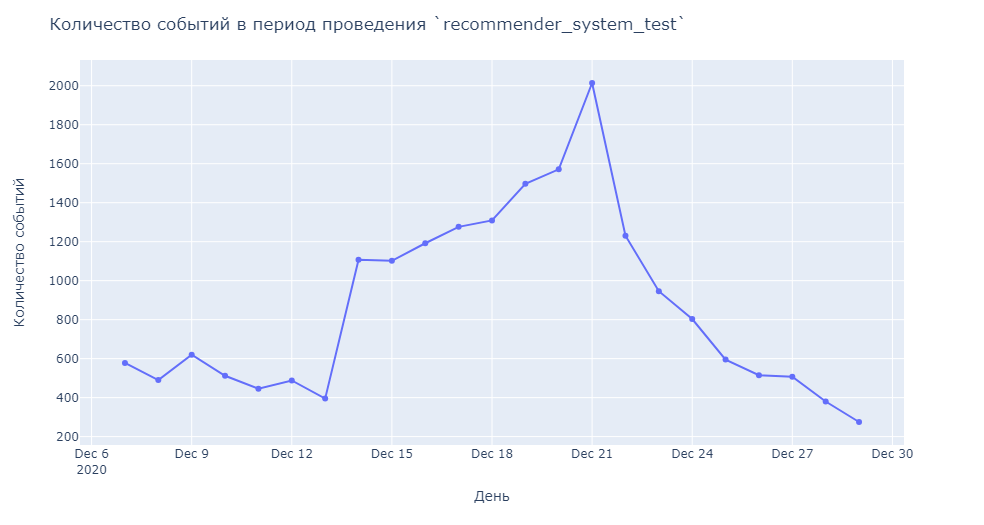

По графику распределения количества событий по дням можем обнаружить, что последний день, в который совершались события для пользователей из региона 'EU' и зарегистрировавшихся с 07-12-2020 по 21-12-2020, это 29-12-2020. Хотя тест recomender_system_test проходит до 04-01-2021. Это вызвано тем, что данные за период после 29-12-2020 нам не были предоставлены.

По графику можем увидеть, что количество событий после начала маркетинговой активности 'Christmas&New Year Promo', то есть начиная с 25-12-2020, сокращается. Но мы не можем утверждать, что это вызвано данной маркетинговой акцией, так как последний день регистрации, который мы учитывали - это 21-12-2020. Обычно после регистрации активность новых пользователей уменьшается. Падение числа событий с 22-12-2020 может быть вызвано отсутствием новых зарегистрированных пользователей.
Проверим данное утверждение.

In [ ]:
df_with_events_filtered_by_lifetime_grouped_by_first_date_and_event_dt = (
    df_with_events_filtered_by_lifetime.groupby(['first_date','event_dt'],as_index=False).agg({'event_name':'count'})
)
df_with_events_filtered_by_lifetime_grouped_by_first_date_and_event_dt.head()

,first_date,event_dt,event_name
0,2020-12-07,2020-12-07,578
1,2020-12-07,2020-12-08,245
2,2020-12-07,2020-12-09,201
3,2020-12-07,2020-12-10,140
4,2020-12-07,2020-12-11,98


In [ ]:
fig = px.line(df_with_events_filtered_by_lifetime_grouped_by_first_date_and_event_dt, # загружаем данные
              x='event_dt', # указываем столбец с данными для оси X
              y='event_name', # указываем столбец с данными для оси Y
              color='first_date', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Количество событий в период проведения `recommender_system_test` по когортам',
                   xaxis_title='День',
                   yaxis_title='Количество событий')
fig.show() # выводим график

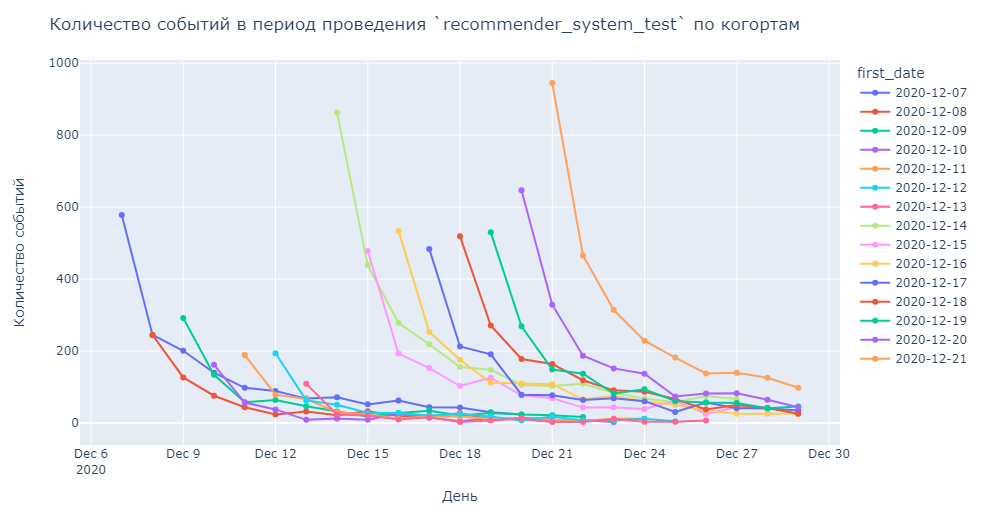

Как видим из графика выше, нет каких-либо существенных изменений в количестве активностей клиентов после начала маркетинговой активности 'Christmas&New Year Promo', то есть после 25-12-2020. Поэтому можем не удалять действия пользователей после 25-12-2020.

У нас также имеются когорты, которые не прожили полностью 13 лайфтаймов. Для того, чтобы принять решение, удалять этих пользователей или нет, посмотрим, на какой день пользователи совершают события.

Рассмотрим событие 'login' в столбце 'event_name':

In [ ]:
df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['event_name']=='login']\
.groupby('user_id').agg({'lifetime':'first'}).describe()

,lifetime
count,3049.000000
mean,0.015743
std,0.264503
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


Рассмотрим событие 'product_cart' в столбце 'event_name':  

In [ ]:
df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['event_name']=='product_cart']\
.groupby('user_id').agg({'lifetime':'first'}).describe()

,lifetime
count,900.000000
mean,0.013333
std,0.225810
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


Рассмотрим событие 'product_page' в столбце 'event_name':  

In [ ]:
df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['event_name']=='product_page']\
.groupby('user_id').agg({'lifetime':'first'}).describe()

,lifetime
count,1905.000000
mean,0.013648
std,0.252763
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


Рассмотрим событие 'purchase' в столбце 'event_name':  

In [ ]:
df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['event_name']=='product_page']\
.groupby('user_id').agg({'lifetime':'first'}).describe()

,lifetime
count,1905.000000
mean,0.013648
std,0.252763
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.000000


При рассмотрении событий 'login', 'product_cart', 'product_page' и 'purchase' можем сделать вывод, что и среднее, и медиана первых событий из перечисленного списка совершается в нулевой лайфтайм или первый день после регистрации.  
Максимальный лайфтайм совершения первого события 'login', 'product_page' и 'purchase' пользоватлями - 8 лайфтайм,'product_cart' - 6 лайфтайм. Исходя из этого, можем оставлять пользователей, данные о которых есть за первые 9 дней после регистрации или за 8 лайфтаймов.  
Пользователи, которые зарегистрировались позже всего - пользователи с регистрацией 21-12-2020, имеют данные о событиях только за первые 9 дней после регистрации.  
Не будем удалять данные из-за того, что нет информации о всех 14 днях после регистрации для некоторых когорт, так как выяснили, что максимальный день, на который совершаются события - 9 день, данные за 9 дней по когортам с неполными данными у нас есть.

**Подсчёт конверсии**

In [ ]:
# отобразим датафрейм с событиями, отфильтрованными по лайфтаййму (14 дней)
df_with_events_filtered_by_lifetime.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,lifetime
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,product_page,NaN,0
1,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test,2020-12-07,login,NaN,0
2,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-07,product_page,NaN,0
3,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-08,product_page,NaN,1
4,DD4352CDCF8C3D57,2020-12-07,EU,Android,B,recommender_system_test,2020-12-10,product_page,NaN,3


In [ ]:
# сгруппированные пользователи A/B-теста recommender_system_test из датафрейма df
count_of_users_in_ab_test

,user_id
group,
A,3195
B,2373


Считать конверсию будем от количества пользователей, которые присутствуют в датафрейме df (эти данные возьмём из датафрейма count_of_users_in_ab_test), то есть от всех отфильтрованных по ТЗ пользователей A/B-теста 'recommender_system_test', в том числе тех, которые не совершили ни одного действия в течение 14 дней после регистрации.

In [ ]:
conversion_A = (
    df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['group']=='A']
    .groupby('event_name').agg({'user_id':'nunique'})
    #sort_values(by='user_id',ascending=False)
    #.loc[['product_page','purchase','product_cart'],:]
    .reindex(['login','product_page','product_cart','purchase'])
)
conversion_A['conversion,%'] = round(conversion_A['user_id']/count_of_users_in_ab_test.loc['A','user_id']*100,2)
display(conversion_A)

,user_id,"conversion,%"
event_name,,
login,2279,71.33
product_page,1476,46.20
product_cart,686,21.47
purchase,734,22.97


In [ ]:
conversion_B = (
    df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['group']=='B']
    .groupby('event_name').agg({'user_id':'nunique'})
    #sort_values(by='user_id',ascending=False)
    #.loc[['product_page','purchase','product_cart'],:]
    .reindex(['login','product_page','product_cart','purchase'])
)
conversion_B['conversion,%'] = round(conversion_B['user_id']/count_of_users_in_ab_test.loc['B','user_id']*100,2)
display(conversion_B)

,user_id,"conversion,%"
event_name,,
login,770,32.45
product_page,429,18.08
product_cart,214,9.02
purchase,219,9.23


**Проверим соответствие данных требованиям ТЗ:**

In [ ]:
f"Как выяснили ранее, количество уникальных участников теста 'recommender_system_test' из датафрейма df: \
{len(df['user_id'])}, что меньше 6000. Однако из этих пользователей совершили хотя бы одно действие только \
{len(df_with_events_filtered_by_lifetime['user_id'].unique())} человек."

"Как выяснили ранее, количество уникальных участников теста 'recommender_system_test' из датафрейма df: 5568, что меньше 6000. Однако из этих пользователей совершили хотя бы одно действие только 3050 человек."

Как выяснили ранее, % пользователей из Европы в тесте 'recommender_system_test' из датафрейма united_df ко всем пользователям из Европы, зарегистрировавшимся с 7 по 21 декабря, из датафрейма final_ab_new_users, составляет: 15%, что совпадает с 15%, указанных в ТЗ. united_df - датафрейм, который состоит из отфильтрованного по дате регистрации и региону пользователей исходного датафрейма final_ab_new_users, соединённого с исходным датафреймом final_ab_participants по столбцу 'user_id'.

Также выясним, совпадает ли ожидаемый эффект от теста с реальными данными по улучшению метрик.  
Ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
- конверсии в просмотр карточек товаров — событие product_page ,
- просмотры корзины — product_cart ,
- покупки — purchase .

In [ ]:
f"Конверсия в просмотры карточек товаров изменилась на \
{(conversion_B.loc['product_page','conversion,%'] - conversion_A.loc['product_page','conversion,%']).round(2)} %."

'Конверсия в просмотры карточек товаров изменилась на -28.12 %.'

In [ ]:
f"Конверсия в просмотры корзины изменилась на \
{(conversion_B.loc['product_cart','conversion,%'] - conversion_A.loc['product_cart','conversion,%']).round(2)} %."

'Конверсия в просмотры корзины изменилась на -12.45 %.'

In [ ]:
f"Конверсия в покупки изменилась на \
{(conversion_B.loc['purchase','conversion,%'] - conversion_A.loc['purchase','conversion,%']).round(2)} %."

'Конверсия в покупки изменилась на -13.74 %.'

Как видим, вместо увеличения, метрики показали уменьшение показателей. Ожидаемый эффект от теста не совпадает с реальными данными.

**Выводы к шагу 3**  
- Отфильтроовали пользователей датафрейма final_ab_new_users по дате регистрации и региону, назвали отфильтрованный датафрейм final_ab_new_users_filtered.  
- Объединили датафреймы final_ab_new_users_filtered и final_ab_participants. Новый датафрейм назвали united_df.  
- Выяснили, что % пользователей из Европы в тесте 'recommender_system_test' из датафрейма united_df ко всем пользователям из Европы, зарегистрировавшимся с 7 по 21 декабря, из датафрейма final_ab_new_users составляет: 15%, что соответствует 15%, указанных в ТЗ.  
- Из датафрейма united_df удалили дубликаты пользователей группы B теста 'interface_eu_test', которые встречаются в тесте 'recommender_system_test'; также удалили пользователей группы B теста 'interface_eu_test', так как они испытывали влияние данного теста. Новый датафрейм назвали united_df_without_users_from_group_B_interface_eu_test.  
- Из датафрейма united_df_without_users_from_group_B_interface_eu_test удалили пользователей группы A теста 'interface_eu_test'; оставили дублирующихся пользователей из группы A теста 'interface_eu_test' в данных с 'recommender_system_test', так как пользователи группы A теста 'interface_eu_test' не подверглись влиянию теста 'interface_eu_test' из-за того, что группа A - контрольная. Отфильтрованный датафрейм назвали df.  
- Объединилли датафрейм df с датафреймом с событиями final_ab_events. Новый датафрейм назвали df_with_events. Выяснили, что в результате такого объединения 2518 пользователей из числа участников теста 'recommender_system_test' датафрейма df не совершали никаких действий. Из 2518 пользователей 916 оказалось из группы A, 1602 - из группы B.  
- В датафрейме df_with_events создали столбец 'lifetime', который отображает разницу в днях между днём совершения события и днём регистрации пользователя. По условиям ТЗ необходимо оставить события только тех пользователей, с момента регистрации которых прошло не более 14 дней, то есть 13 лайфтаймов. Создали отфильтрованный по лайфтайму датафрейм df_with_events_filtered_by_lifetime. Выяснили, что не оказалось пользователей, которые не совершили ни одного действия из-за ограничений по лайфтайму. В результате фильтрации датафрейма df_with_events по лайфтайму удалили 715 событий.  
- Также по условиям ТЗ необходимо оставить только события с 07-12-2020 по 04-01-2021. Выяснили, что минимальная и максимальная даты событий в датафрейме df_with_events_filtered_by_lifetime: 07-12-2020 и 29-12-2020, соответственно. Таким образом обнаружили, что в датафрейме нет данных позднее 29-12-2020, хотя тест 'recommender_system_test' проводится до 04-01-2021 включительно.  
- Выяснили из данных датафрейма ab_project_marketing_events, что во время проведения 'recommender_system_test' происходит маркетинговая активность 'Christmas&New Year Promo'. Для того, чтобы оценить влияние маркетинговой активности на проведение нашего теста, построили график с количеством событий за каждый день проведения теста для каждой когорты пользователей, зарегистрировавшихся с 07-12-2020 по 21-12-2020. Выяснили, что не было каких-либо существенных изменений в количестве активностей клиентов после начала маркетинговой активности 'Christmas&New Year Promo'. Поэтому приняли решение не удалять действия пользователей во время проведения маркетинговой активности 'Christmas&New Year Promo'.  
- Также в датафрейме df_with_events_filtered_by_lifetime имеются когорты, которые не прожили полностью 13 лайфтаймов или 14 дней после регистрации. Для того, чтобы принять решение, удалять этих пользователей или нет, посмотрели, на какой день пользователи совершают события. При рассмотрении событий 'login', 'product_cart', 'product_page' и 'purchase' можем сделать вывод, что и среднее, и медиана первых событий из перечисленного списка совершаются пользователями в нулевой лайфтайм или первый день после регистрации. Максимальный лайфтайм совершения первого события 'login', 'product_page' и 'purchase' пользоватлями - 8 лайфтайм,'product_cart' - 6 лайфтайм. Исходя из этого, приняли решение оставлять пользователей, данные о которых есть за первые 9 дней после регистрации или за 8 лайфтаймов. Пользователи, которые зарегистрировались позже всего по условиям ТЗ - пользователи с регистрацией 21-12-2020, имеют данные о событиях только за первые 9 дней после регистрации. Поэтому не удаляли данные для тех пользователей, с момента регистрации которых не прошло 14 дней.  

- Количество уникальных участников теста 'recommender_system_test' из датафрейма df: 5568, что меньше 6000. Однако из этих пользователей совершили хотя бы одно действие только 3050 человек.  
- В A/B-тест отобрано 15% новых пользователей из региона 'EU', что соответствует условию ТЗ. Также выяснили, совпадает ли ожидаемый эффект от теста с реальными данными по улучшению метрик. По реальным данным:
    - конверсия в просмотры карточек товаров изменилась на -28.23 %;  
    - конверсия в просмотры корзины изменилась на -12.45 %;  
    - конверсия в покупки изменилась на -13.74 %.  
    
    Как видим, вместо увеличения, метрики показали уменьшение показателей. Ожидаемый эффект от теста не совпадает с реальными данными.

## Шаг 4. Проведение исследовательского анализа данных

### Количество событий на пользователя одинаково распределены в выборках?

Рассмотрим, как распределено количество событий на пользователя в датафрейме united_df_with_events_filtered_by_lifetime.

In [ ]:
df_grouped_by_group_and_user = df_with_events_filtered_by_lifetime.groupby(['group','user_id'],as_index=False)\
.agg({'event_dt':'count'})
df_grouped_by_group_and_user.head()

,group,user_id,event_dt
0,A,0010A1C096941592,12
1,A,00341D8401F0F665,2
2,A,003DF44D7589BBD4,15
3,A,00505E15A9D81546,5
4,A,006E3E4E232CE760,6


Опишем, как распределено количество событий на пользователя в группе 'A'.

In [ ]:
df_grouped_by_group_and_user[df_grouped_by_group_and_user['group']=='A'].describe()

,event_dt
count,2279.000000
mean,6.900395
std,3.824760
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,24.000000


Опишем, как распределено количество событий на пользователя в группе 'B'.

In [ ]:
df_grouped_by_group_and_user[df_grouped_by_group_and_user['group']=='B'].describe()

,event_dt
count,771.000000
mean,5.347601
std,3.171882
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,24.000000


In [ ]:
f"Среднее количество событий на пользователя в группе 'A' составляет: \
{df_grouped_by_group_and_user[df_grouped_by_group_and_user['group']=='A']['event_dt'].mean().round(2)}"

"Среднее количество событий на пользователя в группе 'A' составляет: 6.9"

In [ ]:
f"Среднее количество событий на пользователя в группе 'B' составляет: \
{df_grouped_by_group_and_user[df_grouped_by_group_and_user['group']=='B']['event_dt'].mean().round(2)}"

"Среднее количество событий на пользователя в группе 'B' составляет: 5.35"

In [ ]:
f"Среднее количество событий на пользователя в группе 'A' с учётом пользователей, которые не совершали событий, составляет: \
{round(len(df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['group']=='A'])/len(df[united_df['group']=='A']['user_id'].unique()),2)}"

<ipython-input-364-96ce2c8ad4a6>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



"Среднее количество событий на пользователя в группе 'A' с учётом пользователей, которые не совершали событий, составляет: 4.92"

In [ ]:
f"Среднее количество событий на пользователя в группе 'B' с учётом пользователей, которые не совершали событий, составляет: \
{round(len(df_with_events_filtered_by_lifetime[df_with_events_filtered_by_lifetime['group']=='B'])/len(df[united_df['group']=='B']['user_id'].unique()),2)}"

<ipython-input-365-6ade2b008474>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



"Среднее количество событий на пользователя в группе 'B' с учётом пользователей, которые не совершали событий, составляет: 1.74"

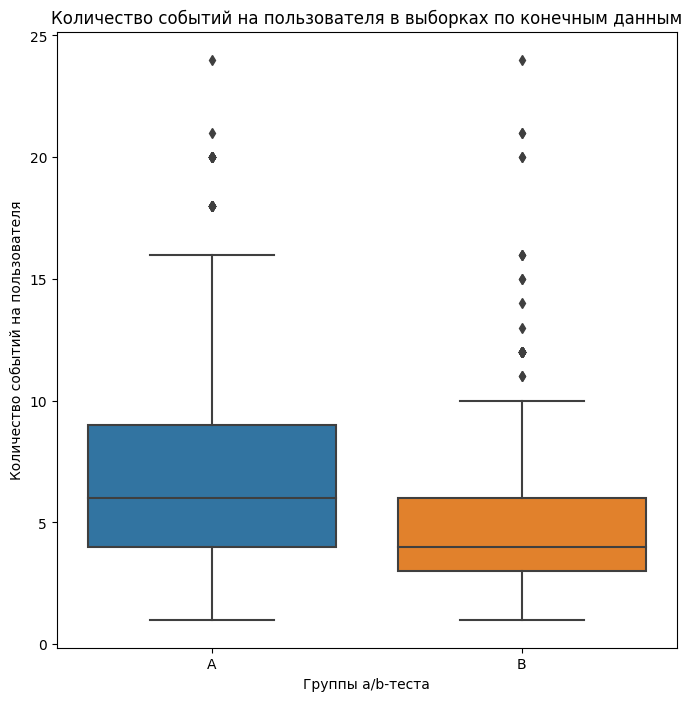

In [ ]:
# сравним события для групп 'A' и 'B' по очищенным данным
plt.figure(figsize=(8, 8))
sns.boxplot(x='group', y='event_dt', data=df_grouped_by_group_and_user)

plt.title('Количество событий на пользователя в выборках по конечным данным')
plt.xlabel('Группы a/b-теста')
plt.ylabel('Количество событий на пользователя')
plt.show()

Можем сделать вывод, что количество событий на пользователя распределено в выборках для групп 'A' и 'B' по-разному. Средняя, медиана, первый и третий квартили для группы 'A' выше, чем для группы 'B'.

### Как число событий в выборках распределено по дням?

Сгруппируем данные для построения диаграммы распределения количества событий по времени.

In [ ]:
df_grouped_by_group_and_date = df_with_events_filtered_by_lifetime.groupby(['group','event_dt'],as_index=False)\
.agg({'user_id':'count'})
df_grouped_by_group_and_date.tail()

,group,event_dt,user_id
41,B,2020-12-25,69
42,B,2020-12-26,46
43,B,2020-12-27,61
44,B,2020-12-28,50
45,B,2020-12-29,34


In [ ]:
fig = px.line(df_grouped_by_group_and_date, # загружаем данные
              x='event_dt', # указываем столбец с данными для оси X
              y='user_id', # указываем столбец с данными для оси Y
              color='group', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Распределение числа событий в выборках по дням',
                   xaxis_title='День',
                   yaxis_title='Количество событий')
fig.show() # выводим график

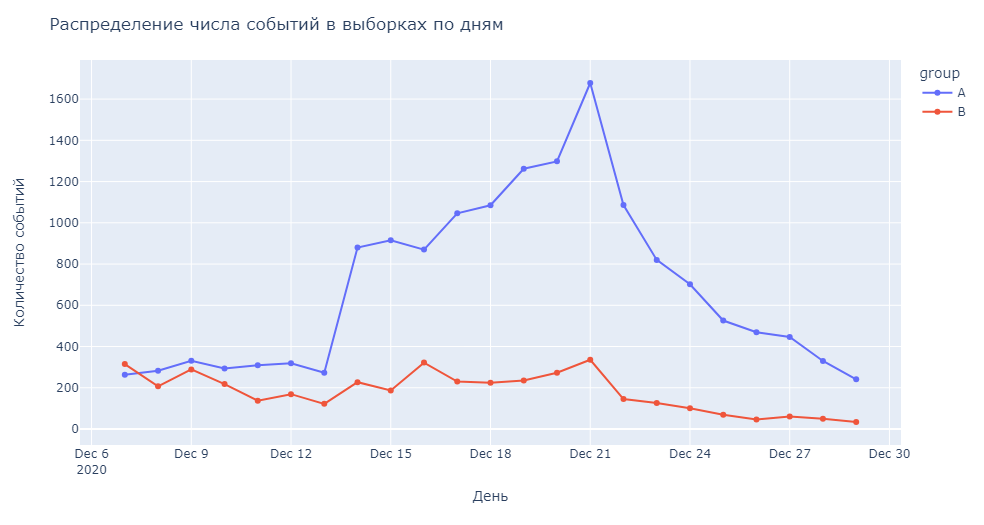

Видим, что количество событий в группе 'A' больше, чем количество событий в группе 'B' для каждого дня на протяжении всего теста, кроме первого дня проведения теста 'recommender_system_test' - 07-12-2020. Это связано с тем, что пользователей из группы 'A' больше, чем пользователей из группы 'B', а также с тем, что количество событий на пользователя также выше в группе 'A', чем в группе 'B'.

### Как меняется конверсия в воронке в выборках на разных этапах?

Конверсия в сгруппированных датафреймах рассчитана от количества пользователей датафрейма df, находящихся в соответствующих группах теста. Количество пользователей в каждой из групп представлено в датафрейме count_of_users_in_ab_test.

In [ ]:
conversion_A

,user_id,"conversion,%"
event_name,,
login,2279,71.33
product_page,1476,46.20
product_cart,686,21.47
purchase,734,22.97


In [ ]:
conversion_B

,user_id,"conversion,%"
event_name,,
login,770,32.45
product_page,429,18.08
product_cart,214,9.02
purchase,219,9.23


Теперь построим график воронки:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = ["all_users", "login", "product_page", "product_cart", "purchase"],
    x = [count_of_users_in_ab_test.loc['A','user_id'], conversion_A.loc['login','user_id'],
         conversion_A.loc['product_page','user_id'], conversion_A.loc['product_cart','user_id'], conversion_A.loc['purchase','user_id']],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    orientation = "h",
    y = ["all_users", "login", "product_page", "product_cart", "purchase"],
    x = [count_of_users_in_ab_test.loc['B','user_id'], conversion_B.loc['login','user_id'],
         conversion_B.loc['product_page','user_id'], conversion_B.loc['product_cart','user_id'], conversion_B.loc['purchase','user_id']],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.show()

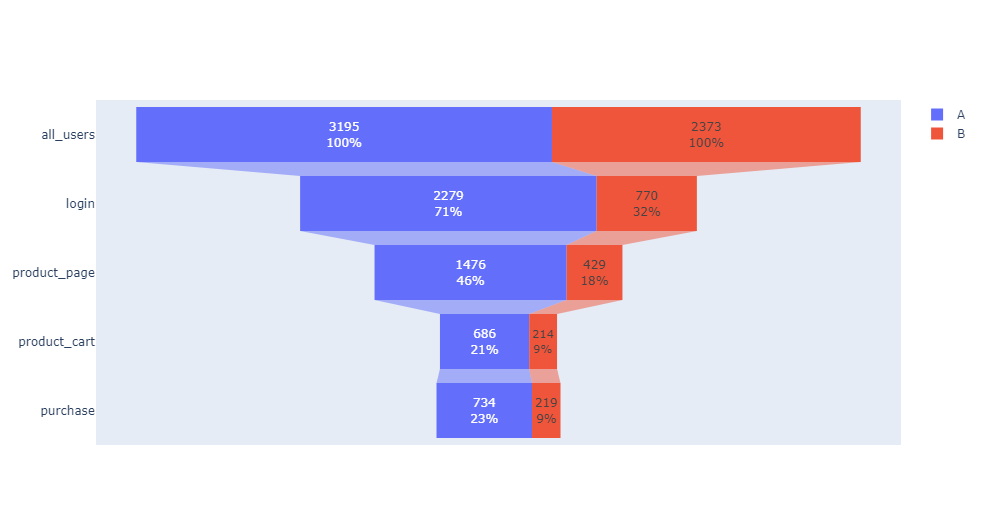

Видим,что событие 'product_cart' набирает в обеих группах меньше пользователей, чем событие 'purchase', хотя событие 'product_cart' должно идти перед событием 'purchase' в воронке. Такая картина обычно наблюдается, когда в магазине реализована "быстрая покупка", то есть возможность купить товар со страницы товара, минуя корзину.

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

**Критерии успешного A/B-теста:**  
- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

В исходных данных в датафрейме final_ab_participants количество участников тестов было следующим:

In [ ]:
final_ab_participants.groupby(['ab_test','group'],as_index=False).agg({'user_id':'count'})

,ab_test,group,user_id
0,interface_eu_test,A,5831
1,interface_eu_test,B,5736
2,recommender_system_test,A,3824
3,recommender_system_test,B,2877


Видим, что разница между группами теста 'recommender_system_test' изначально была более 1%. В результате преобразования данных согласно ТЗ остались следующие пользователи:

In [ ]:
count_of_users_in_ab_test

,user_id
group,
A,3195
B,2373


Стоит отметить, что данные с событиями пользователей представлены не полностью: в датафрейме с событиями нет данных позднее 29-12-2020 с указанными выше пользователями, хотя по условиям ТЗ необходимо оставить только события с 07-12-2020 по 04-01-2021.   
Как видим, условие о том, что в различных группах количество пользователей не должно различаться более, чем на 1%, не выполняется.  
Остальные два условия успешного A/B-теста выполняются.

**Определение минимального размера выборки**

В ТЗ одним из пунктов был:
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие product_page ,
    - просмотры корзины — product_cart ,
    - покупки — purchase.  

Чтобы корректно провести A/B-тест, нужно соблюсти условие о минимальном размере выборки.  
Используя калькулятор размера выборки на сайте https://www.evanmiller.org/ab-testing/sample-size.html, выясним минимальное количество данных для проведения A/B-теста.  


Выведем переменную conversion_A для того, чтобы подставлять данные в калькулятор из неё.

In [ ]:
conversion_A

,user_id,"conversion,%"
event_name,,
login,2279,71.33
product_page,1476,46.20
product_cart,686,21.47
purchase,734,22.97


Для каждого события отобразим количество уникальных пользователей, которые его совершили в каждой из групп A/B-теста 'recommender_system_test'.

In [ ]:
df_with_events_filtered_by_lifetime.groupby(['ab_test','group','event_name']).agg({'user_id':'nunique'})

user_id
ab_test                 group event_name           
recommender_system_test A     login            2279
                              product_cart      686
                              product_page     1476
                              purchase          734
                        B     login             770
                              product_cart      214
                              product_page      429
                              purchase          219

**Определим минимальный размер выборки для определения относительного различия между группами теста в 10% при базовой конверсии 46.20%, мощности теста в 80% и уровне значимости в 5% для события product_page.**

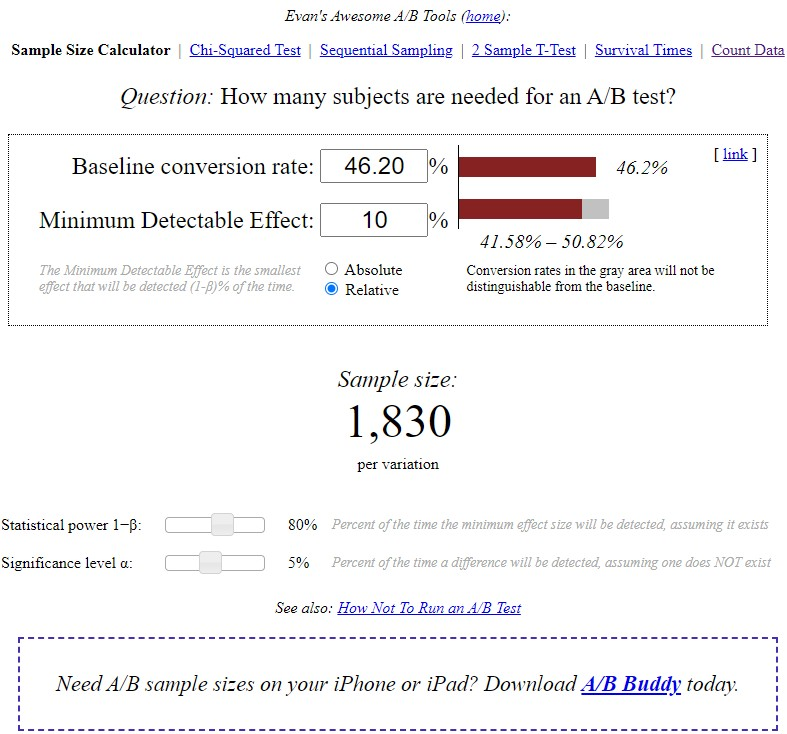

Минимально необходимый размер выборки для события 'product_page' составляет 1830 наблюдений для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 1476 человек, в группе B - 429 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.

**Определим минимальный размер выборки для определения относительного различия между группами теста в 10% при базовой конверсии 21.47%, мощности теста в 80% и уровне значимости в 5% для события product_cart.**

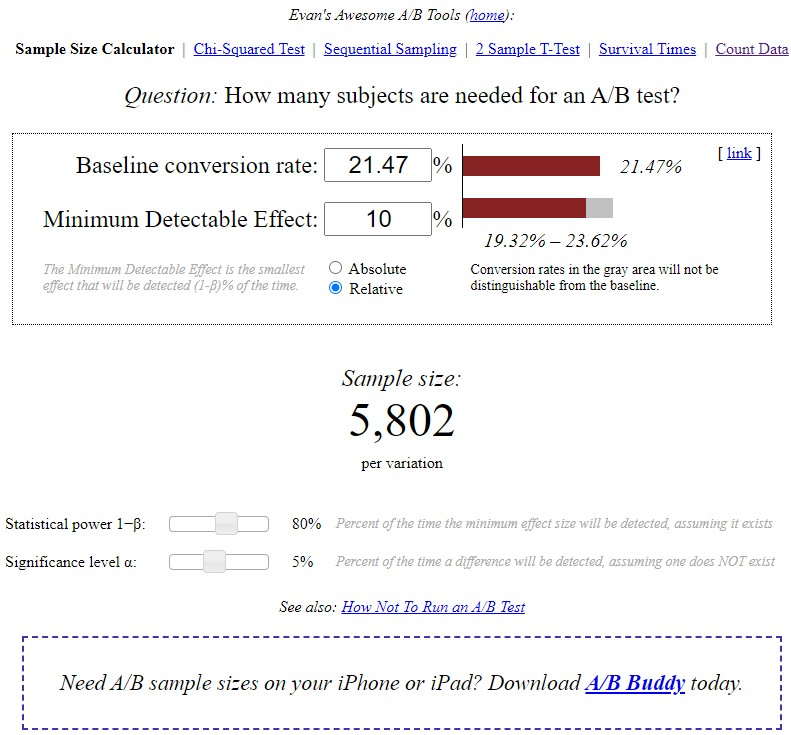

Минимально необходимый размер выборки для события 'product_cart' составляет 5802 наблюдения для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 686 человек, в группе B - 214 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.

**Определим минимальный размер выборки для определения относительного различия между группами теста в 10% при базовой конверсии 22.97%, мощности теста в 80% и уровне значимости в 5% для события purchase.**

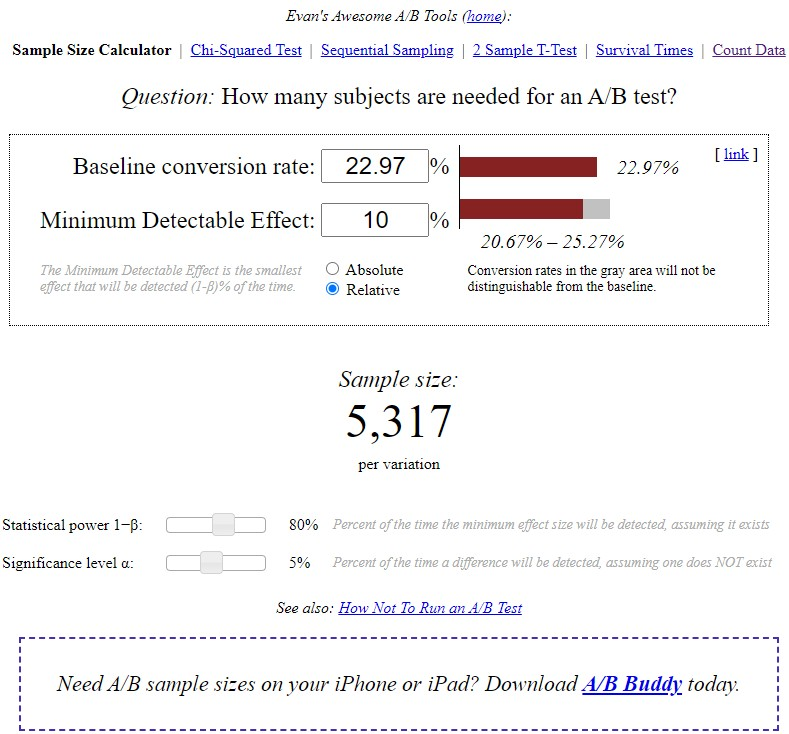

Минимально необходимый размер выборки для события 'purchase' составляет 5317 наблюдений для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 734 человек, в группе B - 219 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.

Таким образом, необходимое количество пользователей не набирается для следующих событий в группах A и B: 'product_page', 'product_cart' и 'purchase'.

Мы не можем сказать, что A/B-тест проведён успешно, так как в группах A и B не хватает количества наблюдений для событий.

**Выводы к шагу 4**  
- На шаге 4.1 выяснили, что количество событий на пользователя распределено в выборках для групп A и B по-разному. Средняя, медиана, первый и третий квартили для группы A выше, чем для группы B.  
- На шаге 4.2 узнали, что количество событий в группе 'A' больше, чем количество событий в группе 'B' для каждого дня на протяжении всего теста, кроме первого дня проведения теста 'recommender_system_test' - 07-12-2020. Это связано с тем, что пользователей из группы 'A' больше, чем пользователей из группы 'B', а также с тем, что количество событий на пользователя также выше в группе 'A', чем в группе 'B'.  
- На шаге 4.3 построили воронку событий для групп A и B. Видим,что событие 'product_cart' набирает в обеих группах меньше пользователей, чем событие 'purchase', хотя событие 'product_cart' должно идти перед событием 'purchase' в воронке. Такая картина обычно наблюдается, когда в магазине реализована "быстрая покупка", то есть возможность купить товар со страницы товара, минуя корзину.   
- На шаге 4.4 рассмотрели критерии успешного A/B-теста: условие, связанное с тем, что в различных группах количество пользователей не должно различаться более, чем на 1%, не выполняется для нашего A/B-теста. Так же выяснили, что в группах A и B не хватает наблюдений для проведения успешного A/B-теста:
     - Минимально необходимый размер выборки для события 'product_page' составляет 1830 наблюдений для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 1476 человек, в группе B - 429 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.
     - Минимально необходимый размер выборки для события 'product_cart' составляет 5802 наблюдения для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 686 человек, в группе B - 214 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.
     - Минимально необходимый размер выборки для события 'purchase' составляет 5317 наблюдений для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 734 человек, в группе B - 219 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.  

Необходимое количество пользователей не набирается для следующих событий в группах A и B: 'product_page', 'product_cart' и 'purchase'. Можем сделать вывод, что проведение A/B-теста не является корректным, так как не соблюдается условие о различии не более, чем на 1% количества пользователей в разных группах, а также условие, связанное с минимальным количеством наблюдений для событий в группах A и B.

## Шаг 5. Оценка результатов A/B-тестирования

Проверим двустороннюю гипотезу о равенстве долей, для события 'product_page', 'product_cart'  и 'purchase' в группе A и группе B. Сформулируем нулевую и альтернативную гипотезы:  

Нулевая гипотеза:
Статистически значимых различий нет для доли пользователей, совершивших события 'product_page', 'product_cart'  и 'purchase' в группе A и группе B.

Альтернативная гипотеза:  
Статистически значимые различия есть для доли пользователей, совершивших события 'product_page', 'product_cart'  и 'purchase' в группе A и группе B.

Примем уровень статистической значимости, равный 5%.

In [ ]:
# создадим функцию для расчёта p_value при проверке гипотезы о равенстве долей

def hypothesis_about_equality_shares_between_2_events(conversion_A, conversion_B, event_name, count_of_users_in_ab_test, alpha, count_hypothesis):

    # conversion_A и conversion_B - это датафреймы с данными о количестве пользователей, совершивших события, которые мы исследуем
    # event_name - исследуемое событие. Подставляем сюда поочерёдно 'product_page', 'product_cart', 'purchase'.
    # count_of_users_in_ab_test - датафрейм с количеством пользователей, участвующих в A/B-тесте.
    # alpha - уровень статистической значимости, принимаем его за 0.05
    # count_hypothesis - это количество гипотез, которые мы проверяем, подставляем это значение в формулу с поправкой Бонферрони

    count = np.array([conversion_A.loc[event_name,'user_id'], conversion_B.loc[event_name,'user_id']])
    nobs = np.array([count_of_users_in_ab_test.loc['A','user_id'], count_of_users_in_ab_test.loc['B','user_id']])

    stat, pval = proportions_ztest(count, nobs)
    #print('{0:0.3f}'.format(pval))

    # Рассчитываем поправку Бонферрони. Необходимо поделить alpha на число гипотез, которое мы проверяем.
    # Мы сравниваем следующие события из группы A и B: product_page, product_cart, purchase - поэтому в нашем случае
    # count_hypothesis = 3

    bonferroni_alpha = alpha / count_hypothesis

    # Тест односторонний: p-value будет в 2 раза меньше
    print(f'p-value при сравнения долей двух групп для события {event_name}: {pval}')

    if pval < bonferroni_alpha:
        print(f"Отвергаем нулевую гипотезу для сравнения двух групп, совершивших событие {event_name}")
    else:
        print(f"Не получилось отвергнуть нулевую гипотезу для сравнения двух групп, совершивших событие {event_name}")

    print()

In [ ]:
for event_name in ['product_page', 'product_cart', 'purchase']:
    # используем функцию для расчёта p_value для сравнения каждого события для двух групп.
    hypothesis_about_equality_shares_between_2_events(conversion_A, conversion_B, event_name, count_of_users_in_ab_test, 0.05, 3)

p-value при сравнения долей двух групп для события product_page: 4.928042043213257e-106
Отвергаем нулевую гипотезу для сравнения двух групп, совершивших событие product_page

p-value при сравнения долей двух групп для события product_cart: 9.244562130443825e-36
Отвергаем нулевую гипотезу для сравнения двух групп, совершивших событие product_cart

p-value при сравнения долей двух групп для события purchase: 2.4854191746713955e-41
Отвергаем нулевую гипотезу для сравнения двух групп, совершивших событие purchase



Совершили 3 проверки. Гипотезы о равенстве долей для событий 'product_page', 'product_cart' и 'purchase' отвергли - это значит, что разница между долями пользователей, которые совершили события 'product_page', 'product_cart' и 'purchase' в группах A и B, статистически значима.

**Вывод к шагу 5**  

На шаге 5 сформулировали нулевую и альтернативную гипотезы:  
    - Нулевая гипотеза:  
Статистически значимых различий нет для доли пользователей, совершивших события 'product_page', 'product_cart'  и 'purchase' в группе A и группе B.  
    - Альтернативная гипотеза:  
Статистически значимые различия есть для доли пользователей, совершивших события 'product_page', 'product_cart'  и 'purchase' в группе A и группе B.  

Гипотезы о равенстве долей для событий 'product_page', 'product_cart' и 'purchase' отвергли - это значит, что разница между долями пользователей, которые совершили события 'product_page', 'product_cart' и 'purchase' в группах A и B, статистически значима.

## Шаг 6. Общий вывод

На шаге 1 :  
   - для проведения исследования загрузили 4 датафрейма: final_ab_events, ab_project_marketing_events, final_ab_new_users, final_ab_participants. Вывели первые 5 строк данных датафреймов.


На шаге 2:  
   - На шаге 2.1 исследовали пропущенные значения. В датафрейме 'final_ab_events' в столбце 'details' обнаружили 377577 пропусков, это 85.75% от всех строк данного датафрейма, поэтому удалять или заменять пропуски не стали. В остальных датафреймах пропусков не обнаружено.  
   - На шаге 2.2 исследовали соответствие типов данных. В датафрейме final_ab_events изменили тип данных столбца 'event_dt' с object на datetime64. В датафрейме ab_project_marketing_events изменили тип данных столбцов 'start_dt' и 'finish_dt' с object на datetime64. В датафрейме final_ab_new_users изменили тип данных столбца 'first_date' с object на datetime64.  
   - На шаге 2.3 исследовали данные на наличие дубликатов. Не обнаружили дубликатов в датафреймах.   
  
  
На шаге 3:  
   - Отфильтроовали пользователей датафрейма final_ab_new_users по дате регистрации и региону, назвали отфильтрованный датафрейм final_ab_new_users_filtered.  
   - Объединили датафреймы final_ab_new_users_filtered и final_ab_participants. Новый датафрейм назвали united_df.  
   - Выяснили, что % пользователей из Европы в тесте 'recommender_system_test' из датафрейма united_df ко всем пользователям из Европы, зарегистрировавшимся с 7 по 21 декабря, из датафрейма final_ab_new_users составляет: 15%, что соответствует 15%, указанных в ТЗ.  
   - Из датафрейма united_df удалили дубликаты пользователей группы B теста 'interface_eu_test', которые встречаются в тесте 'recommender_system_test'; также удалили пользователей группы B теста 'interface_eu_test', так как они испытывали влияние данного теста. Новый датафрейм назвали united_df_without_users_from_group_B_interface_eu_test.  
   - Из датафрейма united_df_without_users_from_group_B_interface_eu_test удалили пользователей группы A теста 'interface_eu_test'; оставили дублирующихся пользователей из группы A теста 'interface_eu_test' в данных с 'recommender_system_test', так как пользователи группы A теста 'interface_eu_test' не подверглись влиянию теста 'interface_eu_test' из-за того, что группа A - контрольная. Отфильтрованный датафрейм назвали df.  
   - Объединилли датафрейм df с датафреймом с событиями final_ab_events. Новый датафрейм назвали df_with_events. Выяснили, что в результате такого объединения 2518 пользователей из числа участников теста 'recommender_system_test' датафрейма df не совершали никаких действий. Из 2518 пользователей 916 оказалось из группы A, 1602 - из группы B.  
   - В датафрейме df_with_events создали столбец 'lifetime', который отображает разницу в днях между днём совершения события и днём регистрации пользователя. По условиям ТЗ необходимо оставить события только тех пользователей, с момента регистрации которых прошло не более 14 дней, то есть 13 лайфтаймов. Создали отфильтрованный по лайфтайму датафрейм df_with_events_filtered_by_lifetime. Выяснили, что не оказалось пользователей, которые не совершили ни одного действия из-за ограничений по лайфтайму. В результате фильтрации датафрейма df_with_events по лайфтайму удалили 715 событий.  
   - Также по условиям ТЗ необходимо оставить только события с 07-12-2020 по 04-01-2021. Выяснили, что минимальная и максимальная даты событий в датафрейме df_with_events_filtered_by_lifetime: 07-12-2020 и 29-12-2020, соответственно. Таким образом обнаружили, что в датафрейме нет данных позднее 29-12-2020, хотя тест 'recommender_system_test' проводится до 04-01-2021 включительно.  
   - Выяснили из данных датафрейма ab_project_marketing_events, что во время проведения 'recommender_system_test' происходит маркетинговая активность 'Christmas&New Year Promo'. Для того, чтобы оценить влияние маркетинговой активности на проведение нашего теста, построили график с количеством событий за каждый день проведения теста для каждой когорты пользователей, зарегистрировавшихся с 07-12-2020 по 21-12-2020. Выяснили, что не было каких-либо существенных изменений в количестве активностей клиентов после начала маркетинговой активности 'Christmas&New Year Promo'. Поэтому приняли решение не удалять действия пользователей во время проведения маркетинговой активности 'Christmas&New Year Promo'.  
   - Также в датафрейме df_with_events_filtered_by_lifetime имеются когорты, которые не прожили полностью 13 лайфтаймов или 14 дней после регистрации. Для того, чтобы принять решение, удалять этих пользователей или нет, посмотрели, на какой день пользователи совершают события. При рассмотрении событий 'login', 'product_cart', 'product_page' и 'purchase' можем сделать вывод, что и среднее, и медиана первых событий из перечисленного списка совершаются пользователями в нулевой лайфтайм или первый день после регистрации. Максимальный лайфтайм совершения первого события 'login', 'product_page' и 'purchase' пользоватлями - 8 лайфтайм,'product_cart' - 6 лайфтайм. Исходя из этого, приняли решение оставлять пользователей, данные о которых есть за первые 9 дней после регистрации или за 8 лайфтаймов. Пользователи, которые зарегистрировались позже всего по условиям ТЗ - пользователи с регистрацией 21-12-2020, имеют данные о событиях только за первые 9 дней после регистрации. Поэтому не удаляли данные для тех пользователей, с момента регистрации которых не прошло 14 дней.  
   - Количество уникальных участников теста 'recommender_system_test' из датафрейма df: 5568, что меньше 6000. Однако из этих пользователей совершили хотя бы одно действие только 3050 человек.  
   - В A/B-тест отобрано 15% новых пользователей из региона 'EU', что соответствует условию ТЗ. Также выяснили, совпадает ли ожидаемый эффект от теста с реальными данными по улучшению метрик. По реальным данным:
       - конверсия в просмотры карточек товаров изменилась на -28.23 %;  
       - конверсия в просмотры корзины изменилась на -12.45 %;  
       - конверсия в покупки изменилась на -13.74 %.  
    
    Как видим, вместо увеличения, метрики показали уменьшение показателей. Ожидаемый эффект от теста не совпадает с реальными данными.
   
    
На шаге 4:  
   - На шаге 4.1 выяснили, что количество событий на пользователя распределено в выборках для групп A и B по-разному. Средняя, медиана, первый и третий квартили для группы A выше, чем для группы B.  
   - На шаге 4.2 узнали, что Видим, что количество событий в группе 'A' больше, чем количество событий в группе 'B' для каждого дня на протяжении всего теста, кроме первого дня проведения теста 'recommender_system_test' - 07-12-2020. Это связано с тем, что пользователей из группы 'A' больше, чем пользователей из группы 'B', а также с тем, что количество событий на пользователя также выше в группе 'A', чем в группе 'B'.  
   - На шаге 4.3 построили воронку событий для групп A и B. Видим,что событие 'product_cart' набирает в обеих группах меньше пользователей, чем событие 'purchase', хотя событие 'product_cart' должно идти перед событием 'purchase' в воронке. Такая картина обычно наблюдается, когда в магазине реализована "быстрая покупка", то есть возможность купить товар со страницы товара, минуя корзину.   
   - На шаге 4.4 рассмотрели критерии успешного A/B-теста: условие, связанное с тем, что в различных группах количество пользователей не должно различаться более, чем на 1%, не выполняется для нашего A/B-теста. Так же выяснили, что в группах A и B не хватает наблюдений для проведения успешного A/B-теста:
     - Минимально необходимый размер выборки для события 'product_page' составляет 1830 наблюдений для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 1476 человек, в группе B - 429 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.
     - Минимально необходимый размер выборки для события 'product_cart' составляет 5802 наблюдения для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 686 человек, в группе B - 214 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.
     - Минимально необходимый размер выборки для события 'purchase' составляет 5317 наблюдений для каждой группы. Видим, что уникальное число пользователей, которые совершили данное событие в группе A теста 'recommender_system_test', составляет 734 человек, в группе B - 219 человек. Таким образом, ни в одной из групп не набирается необходимого количества пользователей.   

Необходимое количество пользователей не набирается для следующих событий в группах A и B: 'product_page', 'product_cart' и 'purchase'. Можем сделать вывод, что проведение A/B-теста не является корректным, так как не соблюдается условие о различии не более, чем на 1% количества пользователей в разных группах, а также условие, связанное с минимальным количеством наблюдений для событий в группах A и B.  

На 5 шаге:  
   - Сформулировали нулевую и альтернативную гипотезы:  
   Нулевая гипотеза:  
       - Статистически значимых различий нет для доли пользователей, совершивших события 'product_page', 'product_cart' и 'purchase' в группе A и группе B.
   Альтернативная гипотеза:  
       - Статистически значимые различия есть для доли пользователей, совершивших события 'product_page', 'product_cart' и 'purchase' в группе A и группе B.

   - Совершили 3 проверки. Гипотезы о равенстве долей для событий 'product_page', 'product_cart' и 'purchase' отвергли. Это значит, что разница между долями пользователей, которые совершили события 'product_page', 'product_cart' и 'purchase' в группах A и B, статистически значима.